In [56]:
# Import the dependencies
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [57]:
data = pd.read_csv('automotive.csv')
data.shape

(936196, 8)

In [58]:
data

,Unnamed: 0,overall,verified,reviewTime,reviewerID,asin,style,unixReviewTime
0,1,1,True,"04 19, 2018",ABCA1A8E4DGV1,0209688726,{'Color:': ' Blue'},1524096000
1,2,1,True,"04 16, 2018",A1NX8HM89FRQ32,0209688726,{'Color:': ' Black'},1523836800
2,3,3,True,"04 13, 2018",A1X77G023NY0KY,0209688726,{'Color:': ' CA'},1523577600
3,4,5,True,"04 8, 2018",A3GK37JO2MGW6Q,0209688726,{'Color:': ' Black'},1523145600
4,5,5,True,"03 24, 2018",AIY18YON1TWJJ,0209688726,{'Color:': ' Black'},1521849600
...,...,...,...,...,...,...,...,...
936191,1711514,5,True,"06 19, 2018",A3H86E5N0F1Q5R,B01HJFDJ8S,NaN,1529366400
936192,1711515,4,True,"08 23, 2017",AXH645B4SSAJY,B01HJFDJ8S,NaN,1503446400
936193,1711516,5,True,"08 8, 2017",AMGJLCCNVFB8,B01HJFDJ8S,NaN,1502150400
936194,1711517,5,True,"08 24, 2018",A1MJUNTX7CTR5U,B01HJI17Y8,{'Size:': ' H8-NEW'},1535068800


In [59]:
data = data.rename(columns={"Unnamed: 0": "id"})
data

,id,overall,verified,reviewTime,reviewerID,asin,style,unixReviewTime
0,1,1,True,"04 19, 2018",ABCA1A8E4DGV1,0209688726,{'Color:': ' Blue'},1524096000
1,2,1,True,"04 16, 2018",A1NX8HM89FRQ32,0209688726,{'Color:': ' Black'},1523836800
2,3,3,True,"04 13, 2018",A1X77G023NY0KY,0209688726,{'Color:': ' CA'},1523577600
3,4,5,True,"04 8, 2018",A3GK37JO2MGW6Q,0209688726,{'Color:': ' Black'},1523145600
4,5,5,True,"03 24, 2018",AIY18YON1TWJJ,0209688726,{'Color:': ' Black'},1521849600
...,...,...,...,...,...,...,...,...
936191,1711514,5,True,"06 19, 2018",A3H86E5N0F1Q5R,B01HJFDJ8S,NaN,1529366400
936192,1711515,4,True,"08 23, 2017",AXH645B4SSAJY,B01HJFDJ8S,NaN,1503446400
936193,1711516,5,True,"08 8, 2017",AMGJLCCNVFB8,B01HJFDJ8S,NaN,1502150400
936194,1711517,5,True,"08 24, 2018",A1MJUNTX7CTR5U,B01HJI17Y8,{'Size:': ' H8-NEW'},1535068800


In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936196 entries, 0 to 936195
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   id              936196 non-null  int64 
 1   overall         936196 non-null  int64 
 2   verified        936196 non-null  bool  
 3   reviewTime      936196 non-null  object
 4   reviewerID      936196 non-null  object
 5   asin            936196 non-null  object
 6   style           339984 non-null  object
 7   unixReviewTime  936196 non-null  int64 
dtypes: bool(1), int64(3), object(4)
memory usage: 50.9+ MB


In [61]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(data['verified'])
data['verified'] = le.transform(data['verified'])
le.fit(data['reviewTime'])
data['reviewTime'] = le.transform(data['reviewTime'])
le.fit(data['reviewerID'])
data['reviewerID'] = le.transform(data['reviewerID'])
le.fit(data['asin'])
data['asin'] = le.transform(data['asin'])
le.fit(data['unixReviewTime'])
data['unixReviewTime'] = le.transform(data['unixReviewTime'])
data.head()

,id,overall,verified,reviewTime,reviewerID,asin,style,unixReviewTime
0,1,1,0,302,131852,0,{'Color:': ' Blue'},838
1,2,1,0,293,28278,0,{'Color:': ' Black'},835
2,3,3,0,284,39302,0,{'Color:': ' CA'},832
3,4,5,0,356,104561,0,{'Color:': ' Black'},827
4,5,5,0,227,140778,0,{'Color:': ' Black'},812


In [62]:
data.describe()

,id,overall,verified,reviewTime,reviewerID,asin,unixReviewTime
count,9.361960e+05,936196.000000,936196.0,936196.000000,936196.000000,936196.000000,936196.000000
mean,1.017011e+06,4.474212,0.0,486.024460,80576.940352,39913.756284,425.653522
std,4.900938e+05,1.054637,0.0,295.389573,46530.831401,23107.704036,258.462531
min,1.000000e+00,1.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,6.262868e+05,4.000000,0.0,231.000000,40293.000000,19185.000000,208.000000
50%,1.132102e+06,5.000000,0.0,462.000000,80572.000000,41197.000000,404.000000
75%,1.419065e+06,5.000000,0.0,747.000000,120948.000000,61276.000000,634.000000
max,1.711518e+06,5.000000,0.0,1005.000000,161087.000000,75893.000000,1005.000000


In [63]:
data.isna().sum()

id                     0
overall                0
verified               0
reviewTime             0
reviewerID             0
asin                   0
style             596212
unixReviewTime         0
dtype: int64

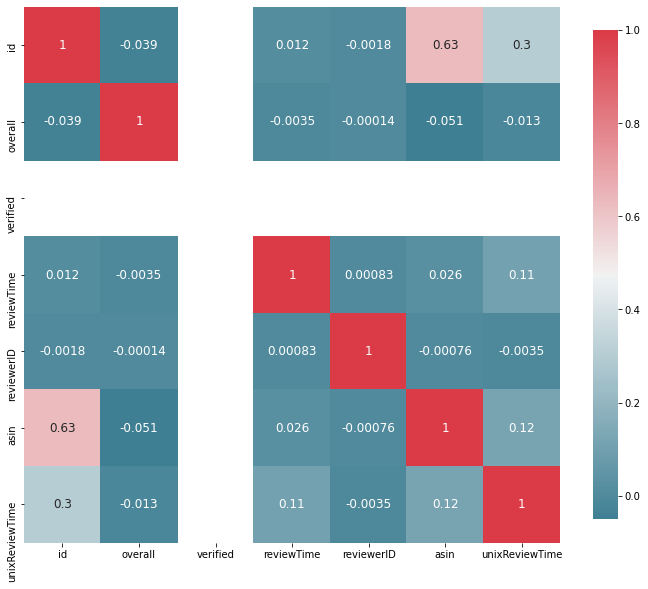

In [64]:
def plot_correlation_map( df ):
    corr = data.corr()
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    _ = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
    )

plot_correlation_map( data )

In [65]:
data = data.drop(['style'],axis=1)

In [66]:
data = data.dropna()
data

,id,overall,verified,reviewTime,reviewerID,asin,unixReviewTime
0,1,1,0,302,131852,0,838
1,2,1,0,293,28278,0,835
2,3,3,0,284,39302,0,832
3,4,5,0,356,104561,0,827
4,5,5,0,227,140778,0,812
...,...,...,...,...,...,...,...
936191,1711514,5,0,485,105376,75891,899
936192,1711515,4,0,682,158123,75891,599
936193,1711516,5,0,724,144944,75891,584
936194,1711517,5,0,686,26680,75893,965


In [67]:
X = data.drop(['overall'],axis=1)
Y = data['overall']

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=6)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(655337, 6)
(280859, 6)
(655337,)
(280859,)


In [68]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear')
model.fit( X_train , Y_train )

LogisticRegression(solver='liblinear')

In [69]:
predictions = model.predict(X_test)
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(Y_test, predictions)
print('Accuracy: %f' % accuracy)

Accuracy: 0.733055
